In [1]:
import os
os.chdir('/scratch/i10-bluesky/src/')
from i10_bluesky.devices.rasor.detectorSlits import *
from i10_bluesky.devices.scalerCard import ScaleCard
from bluesky import RunEngine
from ophyd_async.core import DeviceCollector 
import bluesky.plan_stubs as bps
from bluesky.plans import count, scan 
from ophyd.sim import motor1,det1
from bluesky.callbacks.best_effort import BestEffortCallback
from epics import caget
import asyncio
loop = asyncio.get_event_loop()
bec = BestEffortCallback()
RE = RunEngine({})

In [2]:
with DeviceCollector():
    ds = DetectorSlits('ME01D-MO-APTR',name = "detSlits")
    #dsd = Slits('ME01D-MO-APTR', "-01:TRANS.RBV", "dsd")
    scaler = ScaleCard("ME01D-EA-SCLR-01", name = "rscaler")
    



Transient Scan ID: 1     Time: 2024-03-27 11:03:17
Persistent Unique Scan ID: '690fc10a-9922-42b6-b43a-62889e1b47ec'
New stream: 'primary'
+-----------+------------+--------------+--------------+
|   seq_num |       time | detSlits-dsd | detSlits-dsu |
+-----------+------------+--------------+--------------+
|         1 | 11:03:17.6 |       25.600 |       26.091 |
|         2 | 11:03:17.8 |       25.600 |       26.091 |
|         3 | 11:03:18.0 |       25.600 |       26.091 |
|         4 | 11:03:18.2 |       25.600 |       26.091 |
|         5 | 11:03:18.4 |       25.600 |       26.091 |
|         6 | 11:03:18.6 |       25.600 |       26.091 |
|         7 | 11:03:18.8 |       25.600 |       26.091 |
|         8 | 11:03:19.0 |       25.600 |       26.091 |
|         9 | 11:03:19.2 |       25.600 |       26.091 |
|        10 | 11:03:19.4 |       25.600 |       26.091 |
+-----------+------------+--------------+--------------+
generator count ['690fc10a'] (scan num: 1)





('690fc10a-9922-42b6-b43a-62889e1b47ec',)

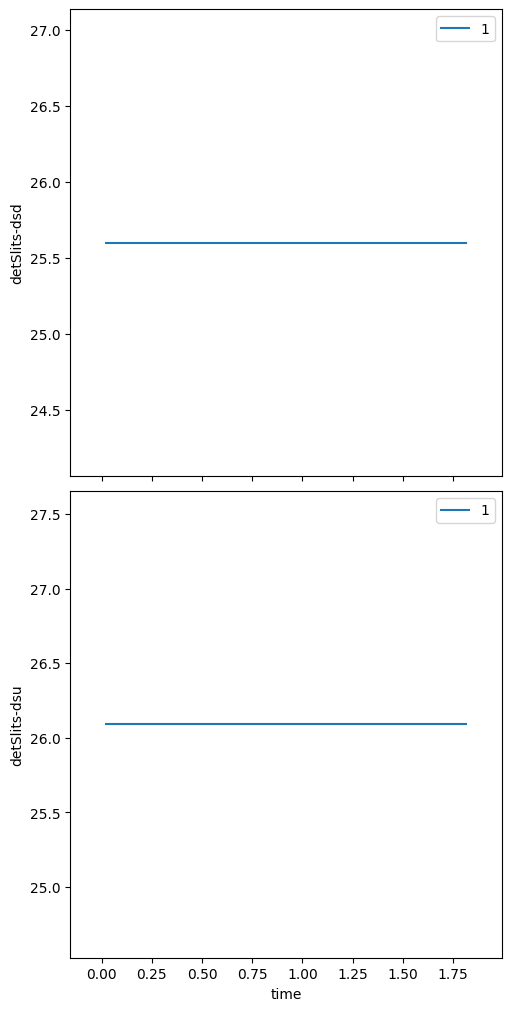

In [3]:
RE(count([ds.dsd,ds.dsu],10,0.2),bec)

In [28]:
loop = asyncio.get_event_loop()
result = loop.create_task(ds.dsd.set(2.5))
print(result)

TypeError: a coroutine was expected, got <AsyncStatus pending>

In [26]:
result.result()

25.600070798748

In [21]:
ds.dsd.setpoint.get_value()

<coroutine object SignalR.get_value at 0x7fcf3c8f7340>

In [2]:
from enum import Enum

class TriggerMode(str, Enum):
    internal = "Internal"
    ext_enable = "Ext. Enable"
    ext_trigger = "Ext. Trigger"
    mult_trigger = "Mult. Trigger"
    alignment = "Alignment"


In [12]:
TriggerMode.internal.value

'Internal'

In [6]:
TriggerMode("Internal")

<TriggerMode.internal: 'Internal'>

In [7]:
for i in TriggerMode:
    print(i)

TriggerMode.internal
TriggerMode.ext_enable
TriggerMode.ext_trigger
TriggerMode.mult_trigger
TriggerMode.alignment
